## Clean Dataframes with E-Ladestation Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df_els = pd.read_csv("ladestationen_MUC_georg.csv")
df_els["aufstelldatum"] = pd.to_datetime(df_els["aufstelldatum"])
df_els.head(3)

,FID,anzahl_els,anzahl_lp_ac,anzahl_lp_alle,anzahl_lp_dc,anzahl_stpl,aufstelldatum,bemerkung,stadtbezirk,standort,haupttyp,haupttyp_bedeutung,shape
0,opendata_ruhver_els_point.1,1,2,2,0,2,2017-05-29,NaN,6,Urbanstr. 2,0,In Betrieb befindliche Ladesäulen,POINT (689684.126600797 5331783.312798096)
1,opendata_ruhver_els_point.2,1,2,2,0,2,2017-10-12,NaN,6,Urbanstr. 6,0,In Betrieb befindliche Ladesäulen,POINT (689751.0750007983 5331777.291698092)
2,opendata_ruhver_els_point.3,2,4,4,0,4,2017-09-14,NaN,18,Reginfriedstr. 2,0,In Betrieb befindliche Ladesäulen,POINT (691870.9652008448 5331775.829797959)


<Axes: xlabel='stadtbezirk'>

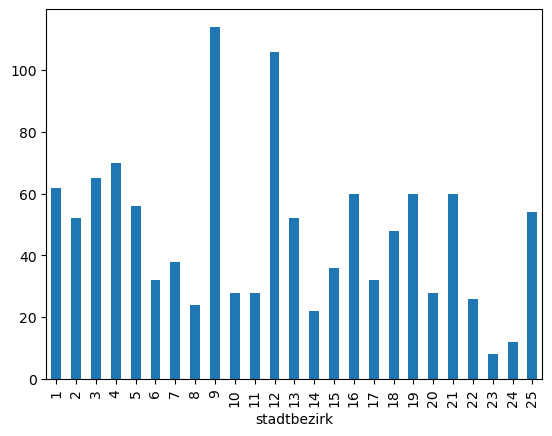

In [112]:
df_els.groupby("stadtbezirk")["anzahl_stpl"].sum().plot(kind="bar")

In [55]:
df_bna = pd.read_csv("ladesaulen_only_muc.csv")
df_bna["Standort"] = df_bna["Straße"] + " " + df_bna["Hausnummer"]
df_bna["Inbetriebnahmedatum"] = pd.to_datetime(df_bna["Inbetriebnahmedatum"])

In [58]:
df_bna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Betreiber                          1619 non-null   object        
 1   Straße                             1619 non-null   object        
 2   Hausnummer                         1619 non-null   object        
 3   Adresszusatz                       99 non-null     object        
 4   Postleitzahl                       1619 non-null   int64         
 5   Ort                                1619 non-null   object        
 6   Bundesland                         1619 non-null   object        
 7   Kreis/kreisfreie Stadt             1619 non-null   object        
 8   Breitengrad                        1619 non-null   object        
 9   Längengrad                         1619 non-null   object        
 10  Inbetriebnahmedatum                1

In [74]:
df_bna_red = df_bna[["Inbetriebnahmedatum", "Standort", "Anzahl Ladepunkte", 
                     "Betreiber", "Postleitzahl", "Breitengrad", "Längengrad",]]

df_bna_red = df_bna_red.rename(columns={"Inbetriebnahmedatum":"Datum", "Anzahl Ladepunkte":"Ladepunkte"})

In [72]:
df_els_red = df_els[["aufstelldatum", "standort", "anzahl_stpl", "stadtbezirk", "shape"]]

df_els_red = df_els_red.rename(columns={"anzahl_stpl":"Ladepunkte", "aufstelldatum":"Datum", "stadtbezirk":"Bezirk",
                                       "standort":"Standort"})

In [107]:
df_bna_red.sort_values("Standort").head(5)

,Datum,Standort,Ladepunkte,Betreiber,Postleitzahl,Breitengrad,Längengrad
406,2020-07-07,Adalbertstraße 82,3,Qwello GmbH,80799,"48,153788","11,573262"
1448,2019-05-09,Adam-Berg-Str. 24,2,SWM Versorgungs GmbH,81735,"48,11371","11,622677"
225,2019-10-16,Agnes-Bernauer-Pl. 8,2,SWM Versorgungs GmbH,80687,"48,140193","11,49647"
226,2019-10-16,Agnes-Bernauer-Pl. 8a,2,SWM Versorgungs GmbH,80687,"48,140208","11,49631"
1107,2018-04-12,Agnes-Pockels-Bogen 1,2,SWM Versorgungs GmbH,80992,"48,173258","11,532358"


In [108]:
df_els_red.sort_values("Standort").head(5)

,Datum,Standort,Ladepunkte,Bezirk,shape
105,2019-04-17,Adam-Berg-Str. 24,4,16,POINT (695197.4377009186 5332245.63149773)
138,2019-09-04,Agnes-Bernauer-Platz 8,4,25,POINT (685710.6557007167 5334898.457198311)
186,2018-04-05,Agnes-Pockels-Bogen 1,2,10,POINT (688265.6010007665 5338656.678198167)
133,2018-12-05,Aindorferstr. 135,4,25,POINT (685594.1170007145 5334010.582798319)
129,2018-12-05,Aindorferstr. 91a,4,25,POINT (686003.9546007224 5333899.750998299)


In [109]:
df_bna_red[df_bna_red["Betreiber"] == "SWM Versorgungs GmbH"]

,Datum,Standort,Ladepunkte,Betreiber,Postleitzahl,Breitengrad,Längengrad
0,2020-01-31,Karl-Hromadnik-Str. 2,2,SWM Versorgungs GmbH,80241,"48,137018","11,456796"
1,2018-12-07,Peter-Kreuder-Str. 5,2,SWM Versorgungs GmbH,80245,"48,159746","11,445709"
2,2018-12-07,Peter-Kreuder-Str. 5a,2,SWM Versorgungs GmbH,80245,"48,159701","11,445643"
3,2018-12-11,Wiesentfelser Str. 16,2,SWM Versorgungs GmbH,80249,"48,147492","11,419531"
12,2017-12-19,Westenriederstr. 39,2,SWM Versorgungs GmbH,80331,"48,135012","11,579745"
...,...,...,...,...,...,...,...
1607,2017-08-07,Robert-Heger-Str. 22,2,SWM Versorgungs GmbH,81927,"48,158571","11,642595"
1608,2019-11-18,Meistersingerstr. 118,2,SWM Versorgungs GmbH,81927,"48,157852","11,637345"
1609,2020-01-13,Schnorr-von-Carolsfeld-Str. 17,2,SWM Versorgungs GmbH,81927,"48,15734","11,646599"
1612,2018-12-07,Marienburger Str. 1,2,SWM Versorgungs GmbH,81929,"48,119093","11,674363"


In [94]:
df_bna_red_ind = df_bna_red.set_index(df_bna_red["Datum"])

In [104]:
df_bna_LP_month = df_bna_red_ind.groupby([(df_bna_red_ind.Datum.index.year
                                          ), (df_bna_red_ind.Datum.index.month)])['Ladepunkte'].sum()

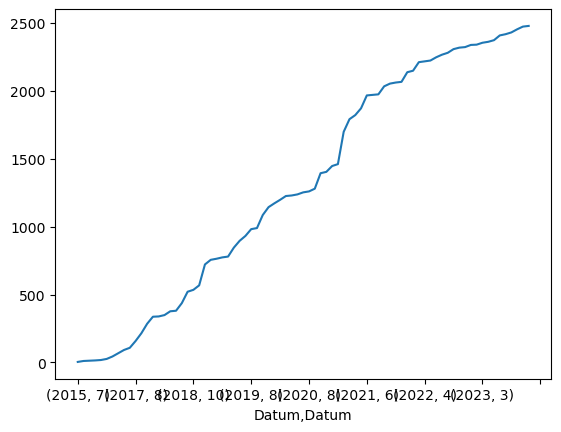

In [111]:
df_bna_LP_month.cumsum().plot()
plt.show()

In [116]:
df_els_date = df_els_red.set_index(df_els_red["Datum"])
df_els_LP_month = df_els_date.groupby([(df_els_date.Datum.index.year
                                          ), (df_els_date.Datum.index.month)])['Ladepunkte'].sum()

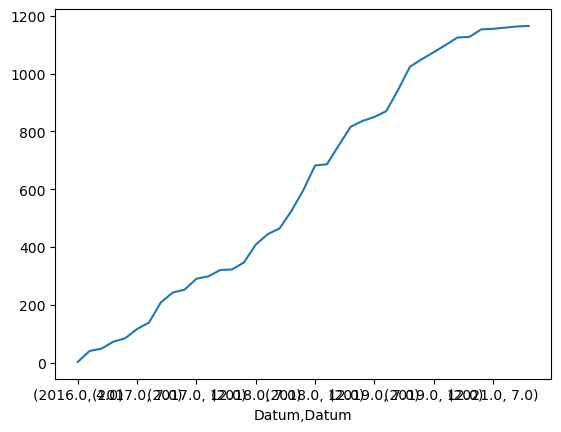

In [117]:
df_els_LP_month.cumsum().plot()
plt.show()